#### Answer 1

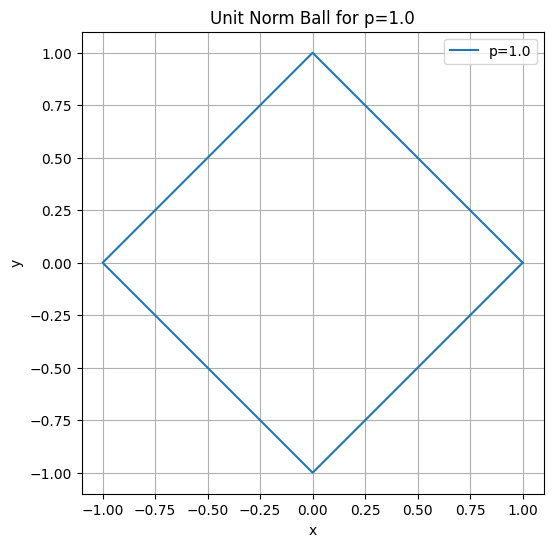

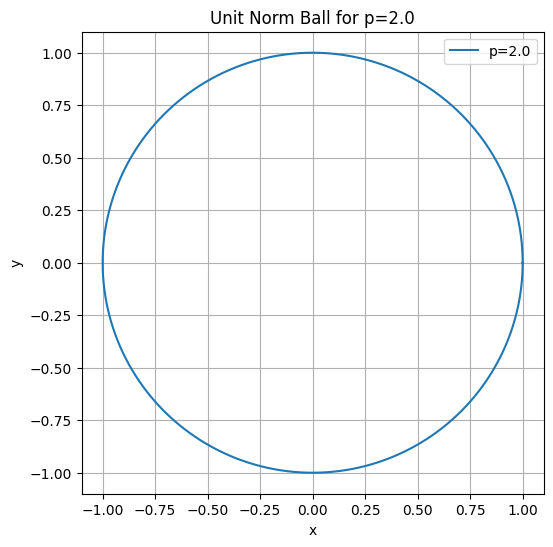

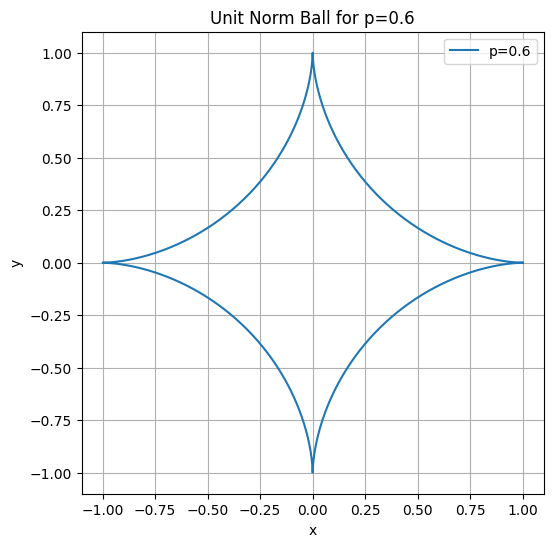

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_unit_norm_ball(p):
    theta = np.linspace(0, 2 * np.pi, 1000)
    x = np.cos(theta)
    y = np.sin(theta)
    
    x_p_norm = np.sign(x) * np.abs(x)**(2/p)
    y_p_norm = np.sign(y) * np.abs(y)**(2/p)
    
    norm = (np.abs(x_p_norm)**p + np.abs(y_p_norm)**p)**(1/p)
    x_p_norm /= norm
    y_p_norm /= norm
    
    plt.figure(figsize=(6, 6))
    plt.plot(x_p_norm, y_p_norm, label=f'p={p}')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f'Unit Norm Ball for p={p}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_unit_norm_ball(1.0)
plot_unit_norm_ball(2.0)
plot_unit_norm_ball(0.6)


In [8]:
print("For p ≥ 1, the unit norm ball is convex, as expected. The shapes observed for p=1 (diamond) and p=2 (circle) confirm this.")
print("For 0 < p < 1, the unit norm ball is not convex. The plot shows that the shape bulges outward, which breaks the convexity property.")


For p ≥ 1, the unit norm ball is convex, as expected. The shapes observed for p=1 (diamond) and p=2 (circle) confirm this.
For 0 < p < 1, the unit norm ball is not convex. The plot shows that the shape bulges outward, which breaks the convexity property.


#### Answer 2

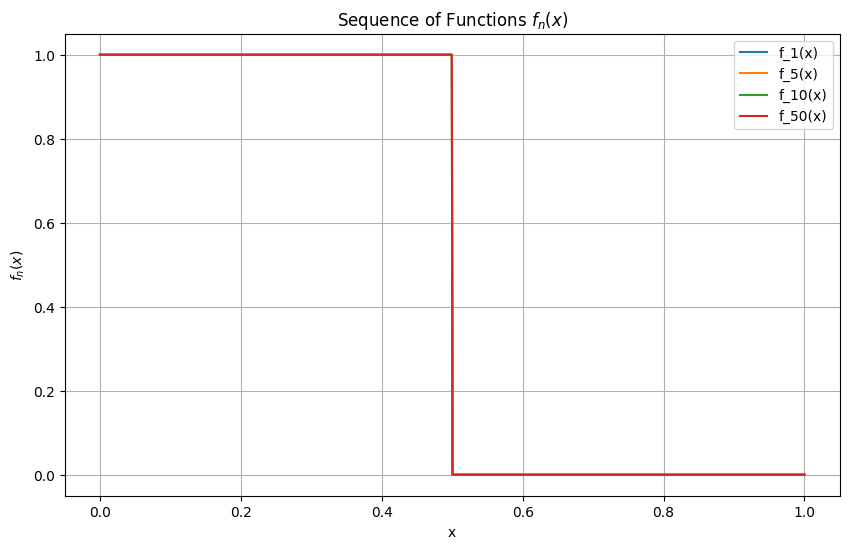

In [34]:
def f_n(x, n):
    if x < 0.5:
        return 1
    elif 0.5 <= x < (0.5 + 1/(2*n)):
        return 1 - 2 * n * (x - 0.5)
    else:
        return 0


def vectorized_f_n(x, n):
    return np.vectorize(lambda x_val: f_n(x_val, n))(x)


x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))

for n in [1, 5, 10, 50]:
    y = vectorized_f_n(x, n)
    plt.plot(x, y, label=f'f_{n}(x)')

plt.title('Sequence of Functions $f_n(x)$')
plt.xlabel('x')
plt.ylabel('$f_n(x)$')
plt.legend()
plt.grid(True)
plt.show()

L1 distances between consecutive functions:
n=1: 0.125
n=2: 0.041666666666666664
n=3: 0.020833333333333343
n=4: 0.012499999999999995
n=5: 0.008333333333333333
n=6: 0.0059523809423058585
n=7: 0.0
n=8: 0.0
n=9: 0.0
n=10: 0.0


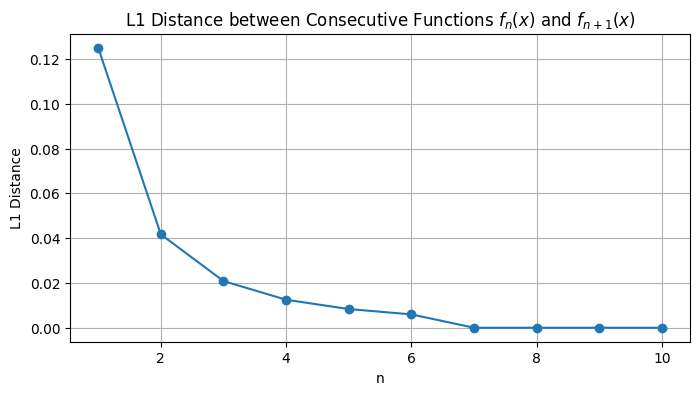

In [36]:
from scipy.integrate import quad

def l1_distance(n, m):
    integrand = lambda x: abs(f_n(x, n) - f_n(x, m))
    distance, _ = quad(integrand, 0, 1)
    return distance

n_values = range(1, 11)
distances = [l1_distance(n, n+1) for n in n_values]

print("L1 distances between consecutive functions:")
for n, distance in zip(n_values, distances):
    print(f"n={n}: {distance}")


plt.figure(figsize=(8, 4))
plt.plot(n_values, distances, marker='o')
plt.title('L1 Distance between Consecutive Functions $f_n(x)$ and $f_{n+1}(x)$')
plt.xlabel('n')
plt.ylabel('L1 Distance')
plt.grid(True)
plt.show()


#### Answer 3

In [40]:
import numpy as np

def entropy(pmf):

    pmf = np.array(pmf)
    

    pmf = np.where(pmf > 0, pmf, 1e-10)
    

    entropy_value = -np.sum(pmf * np.log2(pmf))
    
    return entropy_value


pmf_example = [0.5, 0.5] 
print("Entropy of the PMF [0.5, 0.5]:", entropy(pmf_example), "bits")


Entropy of the PMF [0.5, 0.5]: 1.0 bits


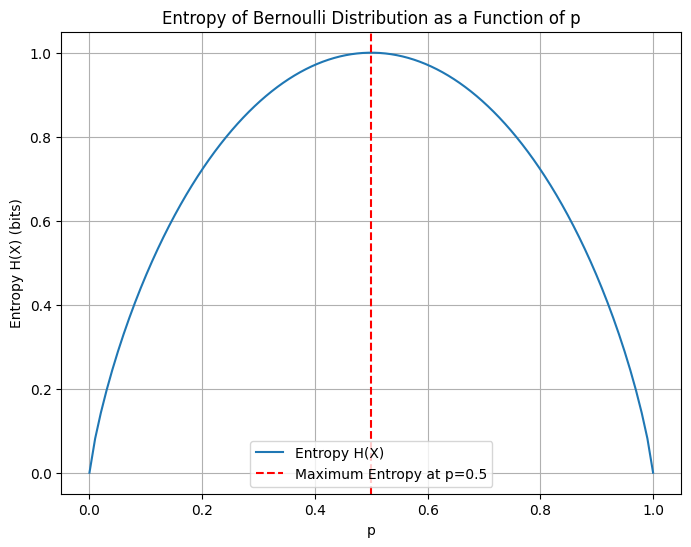

In [33]:
import matplotlib.pyplot as plt

def bernoulli_entropy(p):

    pmf = [p, 1 - p]
    return entropy(pmf)


p_values = np.linspace(0, 1, 100)
entropy_values = [bernoulli_entropy(p) for p in p_values]


plt.figure(figsize=(8, 6))
plt.plot(p_values, entropy_values, label='Entropy H(X)')
plt.title('Entropy of Bernoulli Distribution as a Function of p')
plt.xlabel('p')
plt.ylabel('Entropy H(X) (bits)')
plt.grid(True)
plt.axvline(x=0.5, color='r', linestyle='--', label='Maximum Entropy at p=0.5')
plt.legend()
plt.show()


H(X) is maximized when 𝑝 = 0.5 indicating maximum uncertainty. This corresponds to a fair coin flip, where the outcome is most unpredictable.

#### Answer 7

Entropy of the image: 5.4957


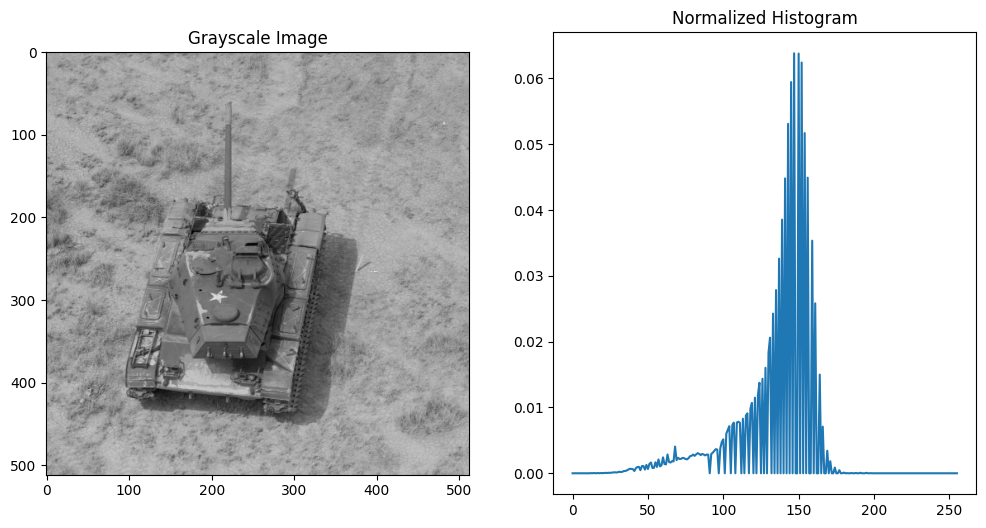

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def normalized_histogram(image):

    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256], density=True)
    return hist

def entropy(p):

    p = p + 1e-9  
    return -np.sum(p * np.log2(p))

def calculate_image_entropy(image_path):

    image = Image.open(image_path).convert('L') 
    image_np = np.array(image)
    
    hist = normalized_histogram(image_np)
    img_entropy = entropy(hist)
    
    return img_entropy


image_path = "7.1.03.tiff"  
image_entropy = calculate_image_entropy(image_path)

print(f"Entropy of the image: {image_entropy:.4f}")


image = Image.open(image_path).convert('L')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
hist = normalized_histogram(np.array(image))
plt.plot(hist)
plt.title('Normalized Histogram')

plt.show()


Entropy of the image: 7.4843


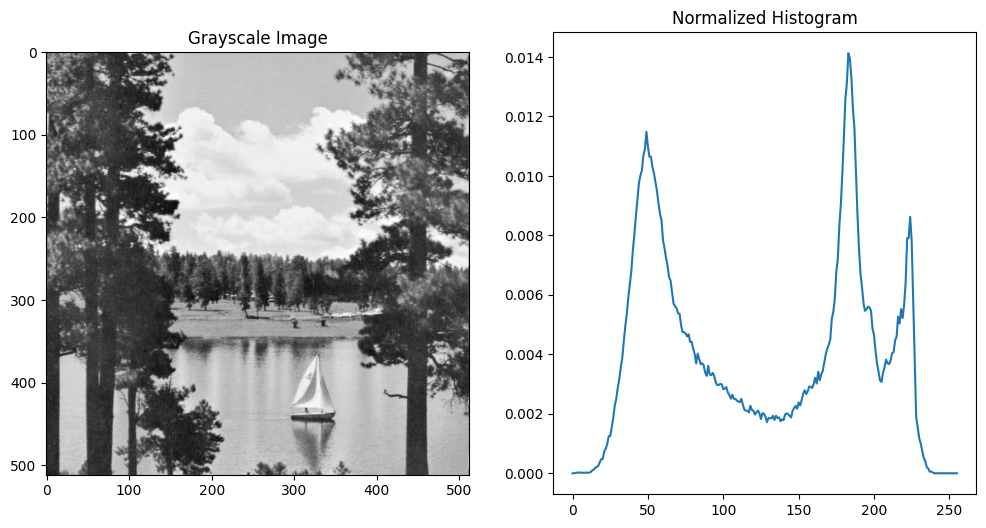

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def normalized_histogram(image):

    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256], density=True)
    return hist

def entropy(p):

    p = p + 1e-9  
    return -np.sum(p * np.log2(p))

def calculate_image_entropy(image_path):

    image = Image.open(image_path).convert('L') 
    image_np = np.array(image)
    
    hist = normalized_histogram(image_np)
    img_entropy = entropy(hist)
    
    return img_entropy


image_path = "4.2.06.tiff"  
image_entropy = calculate_image_entropy(image_path)

print(f"Entropy of the image: {image_entropy:.4f}")


image = Image.open(image_path).convert('L')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
hist = normalized_histogram(np.array(image))
plt.plot(hist)
plt.title('Normalized Histogram')

plt.show()

#### Answer 8

Joint Entropy of the image pair: 13.6767


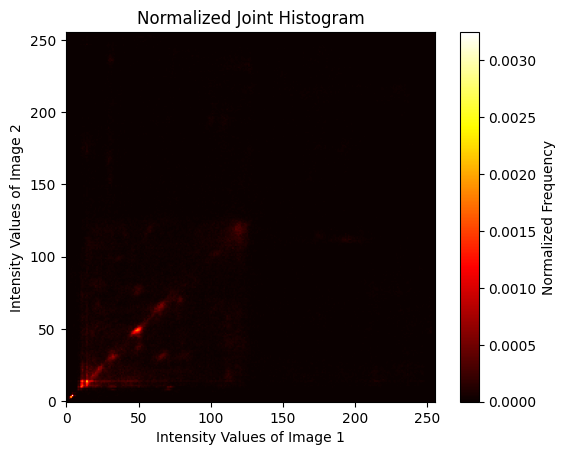

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def normalized_joint_histogram(image1, image2, bins=256):

    joint_hist, x_edges, y_edges = np.histogram2d(image1.flatten(), image2.flatten(), bins=bins, range=[[0, 256], [0, 256]], density=True)
    return joint_hist

def joint_entropy(joint_pmf):

    joint_pmf = joint_pmf + 1e-9  
    return -np.sum(joint_pmf * np.log2(joint_pmf))

def calculate_joint_entropy(image1_path, image2_path):

    image1 = Image.open(image1_path).convert('L')  
    image2 = Image.open(image2_path).convert('L') 
    image1_np = np.array(image1)
    image2_np = np.array(image2)
    
    joint_hist = normalized_joint_histogram(image1_np, image2_np)
    img_joint_entropy = joint_entropy(joint_hist)
    
    return img_joint_entropy, joint_hist

image1_path = "left.png"  
image2_path = "right.png"  
img_joint_entropy, joint_hist = calculate_joint_entropy(image1_path, image2_path)

print(f"Joint Entropy of the image pair: {img_joint_entropy:.4f}")


plt.imshow(joint_hist, origin='lower', cmap='hot')
plt.colorbar(label='Normalized Frequency')
plt.title('Normalized Joint Histogram')
plt.xlabel('Intensity Values of Image 1')
plt.ylabel('Intensity Values of Image 2')
plt.show()


### Answer 9

In [28]:
from PIL import Image

def conditional_pmf(joint_pmf, condition_on='X', condition_value=0):

    if condition_on == 'X':
        marginal_p = np.sum(joint_pmf[condition_value, :])
        if marginal_p == 0:
            return np.zeros(joint_pmf.shape[1])
        conditional_p = joint_pmf[condition_value, :] / marginal_p
    elif condition_on == 'Y':
        marginal_p = np.sum(joint_pmf[:, condition_value])
        if marginal_p == 0:
            return np.zeros(joint_pmf.shape[0])
        conditional_p = joint_pmf[:, condition_value] / marginal_p
    else:
        raise ValueError("condition_on must be 'X' or 'Y'")
    
    return conditional_p

def conditional_entropy(joint_pmf, condition_on='X'):

    conditional_entropy_value = 0.0
    
    if condition_on == 'X':
        marginal_p = np.sum(joint_pmf, axis=1) 
        for x in range(joint_pmf.shape[0]):
            if marginal_p[x] == 0:
                continue 
            conditional_p = conditional_pmf(joint_pmf, 'X', x)
            conditional_entropy_value += marginal_p[x] * -np.sum(conditional_p * np.log2(conditional_p + 1e-9))
    elif condition_on == 'Y':
        marginal_p = np.sum(joint_pmf, axis=0)  
        for y in range(joint_pmf.shape[1]):
            if marginal_p[y] == 0:
                continue  
            conditional_p = conditional_pmf(joint_pmf, 'Y', y)
            conditional_entropy_value += marginal_p[y] * -np.sum(conditional_p * np.log2(conditional_p + 1e-9))
    else:
        raise ValueError("condition_on must be 'X' or 'Y'")
    
    return conditional_entropy_value

def test_conditional_entropy(joint_pmf):

    H_Y_given_X = conditional_entropy(joint_pmf, 'X')
    H_X_given_Y = conditional_entropy(joint_pmf, 'Y')

    print(f"H(Y|X): {H_Y_given_X:.4f}")
    print(f"H(X|Y): {H_X_given_Y:.4f}")

def normalized_joint_histogram(image1, image2, bins=256):

    hist_2d, xedges, yedges = np.histogram2d(image1.ravel(), image2.ravel(), bins=bins, range=[[0, 256], [0, 256]])
    joint_hist = hist_2d / np.sum(hist_2d)  
    return joint_hist


image1_path = "left.png"  
image2_path = "right.png"  
image1 = Image.open(image1_path).convert('L')
image2 = Image.open(image2_path).convert('L')
image1_np = np.array(image1)
image2_np = np.array(image2)


joint_hist = normalized_joint_histogram(image1_np, image2_np)


test_conditional_entropy(joint_hist)


H(Y|X): 6.4169
H(X|Y): 6.3966


#### Answer 10

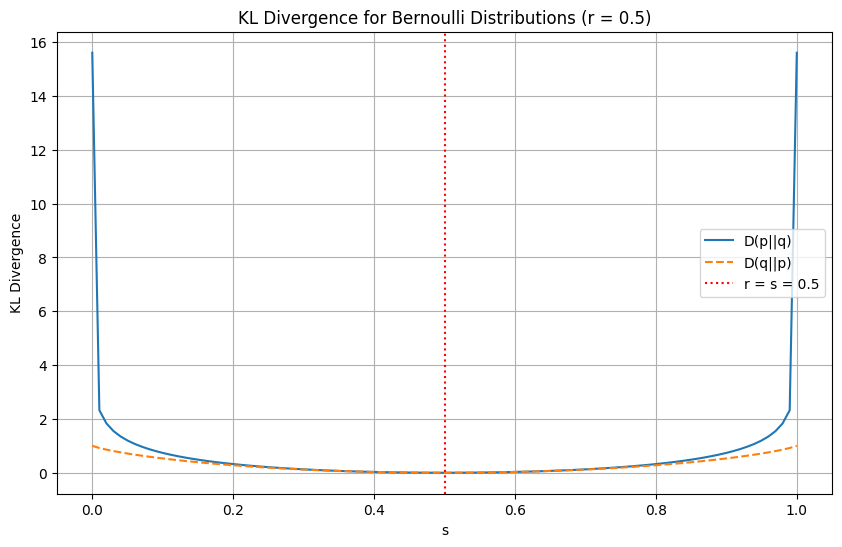

KL Divergence D(p||q): 0.0151
KL Divergence D(q||p): 0.0144
KL divergence measures the difference between distributions, not necessarily perceptual similarity, so it might not always reflect how similar two images look to the human eye.


In [29]:
def kl_divergence(p, q):

    p = np.array(p, dtype=np.float64)
    q = np.array(q, dtype=np.float64)
    

    p = np.where(p == 0, 1e-10, p)
    q = np.where(q == 0, 1e-10, q)
    
    return np.sum(p * np.log2(p / q))


def explore_kl_divergence(r, s_values):

    p = [r, 1 - r]
    
    D_pq = []
    D_qp = []
    
    for s in s_values:
        q = [s, 1 - s]
        D_pq.append(kl_divergence(p, q))
        D_qp.append(kl_divergence(q, p))
    

    plt.figure(figsize=(10, 6))
    plt.plot(s_values, D_pq, label='D(p||q)')
    plt.plot(s_values, D_qp, label='D(q||p)', linestyle='--')
    plt.title(f'KL Divergence for Bernoulli Distributions (r = {r})')
    plt.xlabel('s')
    plt.ylabel('KL Divergence')
    plt.axvline(x=r, color='r', linestyle=':', label=f'r = s = {r}')
    plt.legend()
    plt.grid(True)
    plt.show()


r = 0.5
s_values = np.linspace(0, 1, 100)
explore_kl_divergence(r, s_values)



def kl_divergence_images(image1_path, image2_path):

    image1 = Image.open(image1_path).convert('L')
    image2 = Image.open(image2_path).convert('L')
    image1_np = np.array(image1)
    image2_np = np.array(image2)
    

    joint_hist1 = normalized_joint_histogram(image1_np, image2_np, bins=256)
    p = np.sum(joint_hist1, axis=1)
    q = np.sum(joint_hist1, axis=0)
    

    D_pq = kl_divergence(p, q)
    D_qp = kl_divergence(q, p)
    
    return D_pq, D_qp


image1_path = "left.png"  
image2_path = "right.png"  

D_pq, D_qp = kl_divergence_images(image1_path, image2_path)
print(f"KL Divergence D(p||q): {D_pq:.4f}")
print(f"KL Divergence D(q||p): {D_qp:.4f}")


print("KL divergence measures the difference between distributions, not necessarily perceptual similarity, so it might not always reflect how similar two images look to the human eye.")


